# Modeling

In [45]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Train Set): %.2f" % model.score(xtrain, ytrain))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("\nPrecision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

In [39]:
# cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

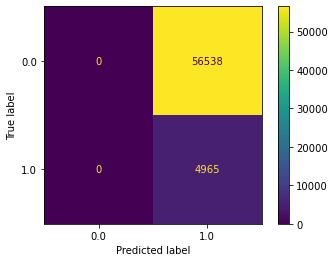

In [40]:
currentperform = y_val.to_frame()
currentperform['predict'] = 1
ConfusionMatrixDisplay.from_predictions(currentperform['TARGET'], currentperform['predict'])

### Logistic Regression

In [41]:
model_lr = LogisticRegression(max_iter=1000, class_weight = 'balanced')

scores = cross_val_score(model_lr, X_train_e, y_train, scoring = 'roc_auc', cv = cv)
scores.mean()

0.7494983231231368

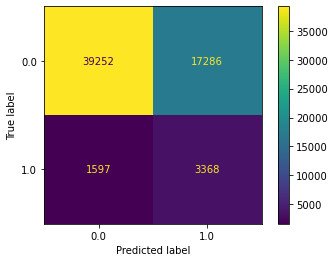

In [42]:
model_lr.fit(X_train_e, y_train)

y_pred_val = model_lr.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [43]:
eval_classification(model_lr, y_pred_val, X_train_e, y_train, X_val_e, y_val)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.69

Precision (Test Set): 0.16
Recall (Test Set): 0.68
F1-Score (Test Set): 0.26
AUC: 0.69


In [52]:
model_lr.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning

Wall time: 53min 53s


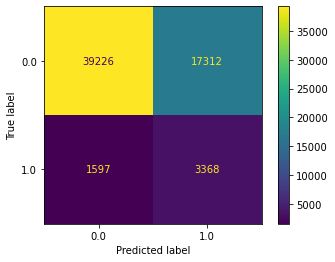

In [44]:
%%time
# List of hyperparameter
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)

model_lr_tuned = RandomizedSearchCV(model_lr, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')
model_lr_tuned.fit(X_train_e, y_train)

y_pred_val = model_lr_tuned.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [46]:
eval_classification(model_lr_tuned, y_pred_val, X_train_e, y_train, X_val_e, y_val)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.69

Precision (Test Set): 0.16
Recall (Test Set): 0.68
F1-Score (Test Set): 0.26
AUC: 0.69


In [50]:
model_lr_tuned.best_estimator_.get_params()

{'C': 100,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Decision Tree

In [53]:
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
scores = cross_val_score(model_dt, X_train_e, y_train, cv=cv, scoring='roc_auc')
scores.mean()

0.5363972895273562

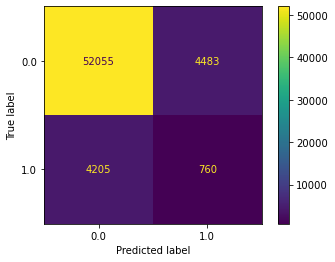

In [54]:
model_dt.fit(X_train_e, y_train)

y_pred_val = model_dt.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [55]:
eval_classification(model_dt, y_pred_val, X_train_e, y_train, X_val_e, y_val)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.86

Precision (Test Set): 0.14
Recall (Test Set): 0.15
F1-Score (Test Set): 0.15
AUC: 0.54


In [56]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

#### Hyperparameter Tuning

Wall time: 1min 1s


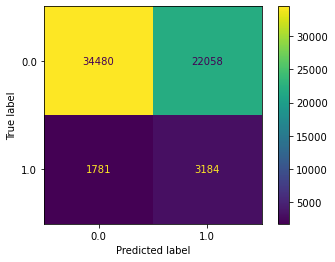

In [57]:
%%time
# List of hyperparameter
max_depth = [3,4,5] 
min_samples_split = [20,30, 40, 50, 75, 100] 
min_samples_leaf = [ 20,30, 40, 50] 
max_features = ['auto', 'sqrt','log2'] 
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

model_dt_tuned = RandomizedSearchCV(model_dt, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')
model_dt_tuned.fit(X_train_e, y_train)

y_pred_val = model_dt_tuned.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [58]:
eval_classification(model_dt_tuned, y_pred_val, X_train_e, y_train, X_val_e, y_val)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.61

Precision (Test Set): 0.13
Recall (Test Set): 0.64
F1-Score (Test Set): 0.21
AUC: 0.63


In [59]:
model_dt_tuned.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 30,
 'min_samples_split': 75,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Random Forest

In [60]:
model_rf = RandomForestClassifier(class_weight = 'balanced')
model_rf.fit(X_train_e, y_train)

RandomForestClassifier(class_weight='balanced')

In [61]:
scores = cross_val_score(model_rf, X_train_e, y_train, scoring = 'roc_auc', cv = cv)
scores.mean()

0.7254597811252791

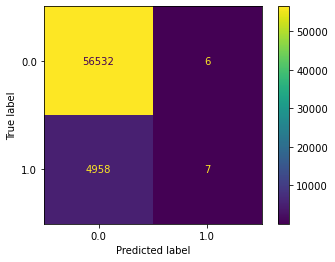

In [62]:
y_pred_val = model_rf.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [63]:
eval_classification(model_rf, y_pred_val, X_train_e, y_train, X_val, y_val)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92

Precision (Test Set): 0.54
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [64]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.54      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.73      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



#### Hyperparameter Tuning

Wall time: 39min 48s


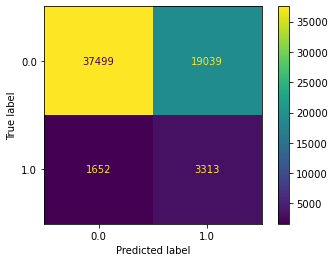

In [65]:
%%time
# List of hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 4)]
max_depth = [3] 
min_samples_split = [20,30, 40, 50, 75, 100] 
min_samples_leaf = [10, 20, 30, 40, 50] 
max_features = ['auto', 'sqrt','log2'] 
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       n_estimators=n_estimators,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

model_rf_tuned = RandomizedSearchCV(model_rf, hyperparameters, cv=cv, random_state=42, scoring='roc_auc')
model_rf_tuned.fit(X_train_e, y_train)

y_pred_val = model_rf_tuned.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [66]:
eval_classification(model_rf_tuned, y_pred_val, X_train_e, y_train, X_val_e, y_val)

Accuracy (Train Set): 0.72
Accuracy (Test Set): 0.66

Precision (Test Set): 0.15
Recall (Test Set): 0.67
F1-Score (Test Set): 0.24
AUC: 0.67


In [67]:
model_rf_tuned.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 40,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 233,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     56538
         1.0       0.15      0.67      0.24      4965

    accuracy                           0.66     61503
   macro avg       0.55      0.67      0.51     61503
weighted avg       0.89      0.66      0.74     61503



#### XGBoost

In [54]:
model_xgb = XGBClassifier(objective='binary:logistic', class_weight = 'balanced')
model_xgb.fit(X_train_e, y_train)

scores = cross_val_score(model_xgb, X_train_e, y_train, scoring = 'roc_auc', cv = cv)
scores.mean()

[12:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

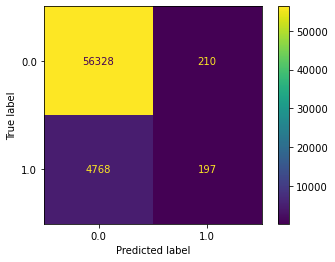

In [58]:
model_xgb = XGBClassifier(learning_rate = 0.34, objective = 'binary:logistic', eval_metric = 'aucpr', random_state = 42)
model_xgb.fit(X_train_e, y_train)

y_pred_val = model_xgb.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

In [63]:
eval_classification(model_xgb, y_pred_val, X_train_e, y_train, X_val, y_val)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.92

Precision (Test Set): 0.48
Recall (Test Set): 0.04
F1-Score (Test Set): 0.07
AUC: 0.48


In [67]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.48      0.04      0.07      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.52      0.52     61503
weighted avg       0.89      0.92      0.89     61503



## Oversampling

In [69]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_e, y_train)

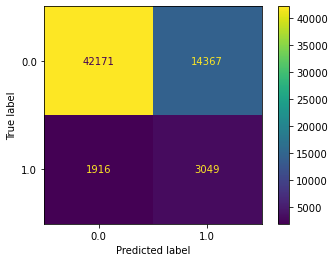

In [70]:
xgb2 = XGBClassifier(learning_rate = 0.31, 
                     objective = 'binary:logistic', 
                     eval_metric = 'aucpr', 
                     random_state = 42)

xgb2.fit(X_resampled, y_resampled)
y_pred_val2 = xgb2.predict(X_val_e)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val2)

In [71]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb2.score(X_resampled, y_resampled)))
print('Accuracy of XGB classifier on validation set: {:.2f}'
       .format(xgb2.score(X_val_e, y_val)))
print(classification_report(y_val, y_pred_val2))

Accuracy of XGB classifier on training set: 0.77
Accuracy of XGB classifier on validation set: 0.74
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84     56538
         1.0       0.18      0.61      0.27      4965

    accuracy                           0.74     61503
   macro avg       0.57      0.68      0.56     61503
weighted avg       0.89      0.74      0.79     61503



In [96]:
y_pred_proba = xgb2.predict_proba(X_val_e)
y_pred_proba = y_pred_proba[:][:,1]

y_val_temp = y_val.copy()
y_val_temp.reset_index(drop=True, inplace=True)
y_pred_proba = pd.concat([y_val_temp, pd.DataFrame(y_pred_proba)], axis=1)

y_pred_proba.columns = ['y_val_actual', 'y_pred_proba']
y_pred_proba.index = X_val_e.index

Text(0, 0.5, 'True Positive Rate')

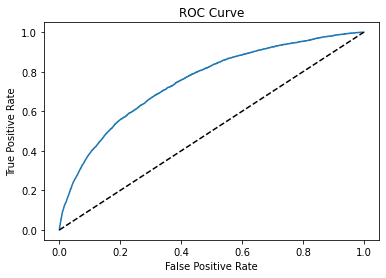

In [97]:
fpr, tpr, thresholds = roc_curve(y_pred_proba['y_val_actual'], y_pred_proba['y_pred_proba'])
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle='--', color='k')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

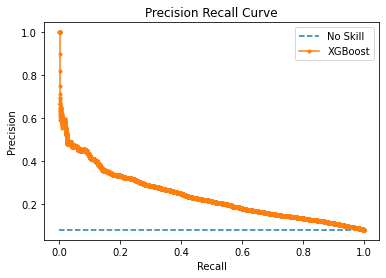

In [98]:
no_skill = len(y_val[y_val == 1]) / len(y_val)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')

precision, recall, thresholds = precision_recall_curve(y_pred_proba['y_val_actual'], y_pred_proba['y_pred_proba'])
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

<Figure size 720x720 with 0 Axes>

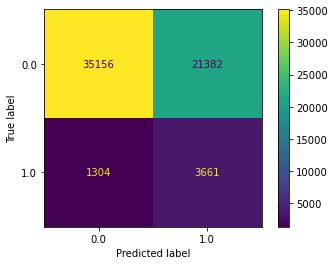

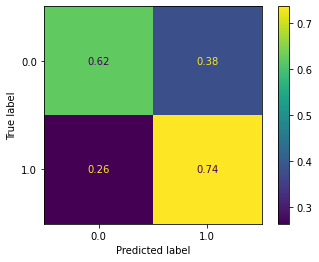

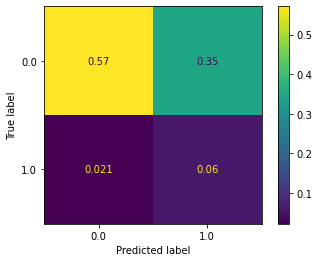

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
t = 0.4
y_pred_proba['y_val_pred'] = np.where(y_pred_proba['y_pred_proba'] > t, 1, 0)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_proba['y_val_pred'])
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_proba['y_val_pred'], normalize='true')
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_proba['y_val_pred'], normalize='all')

In [ ]:
pip install shap

In [119]:
import shap
# Fits the explainer
explainer = shap.Explainer(xgb2.predict, X_val_e)
# Calculates the SHAP values
shap_values = explainer(X_val_e)

Permutation explainer: 61504it [1:09:39, 14.69it/s]                                                                    


In [120]:
# Force plot for TARGET=0
shap.initjs()
shap.plots.force(shap_values[1])

In [121]:
# Force plot for TARGET=1
shap.initjs()
shap.plots.force(shap_values[0])

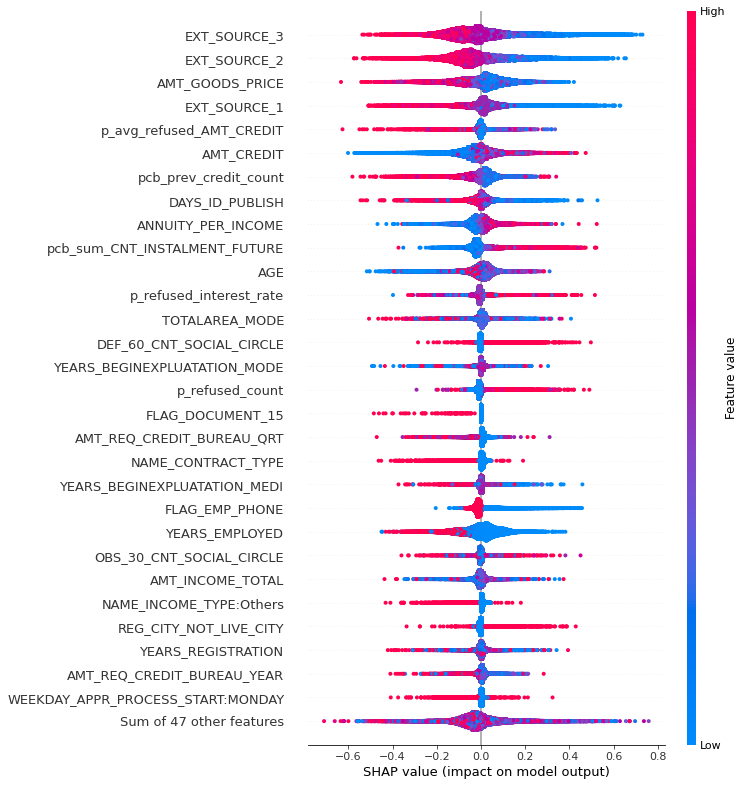

In [122]:
# Beeswarm plot 
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=30)

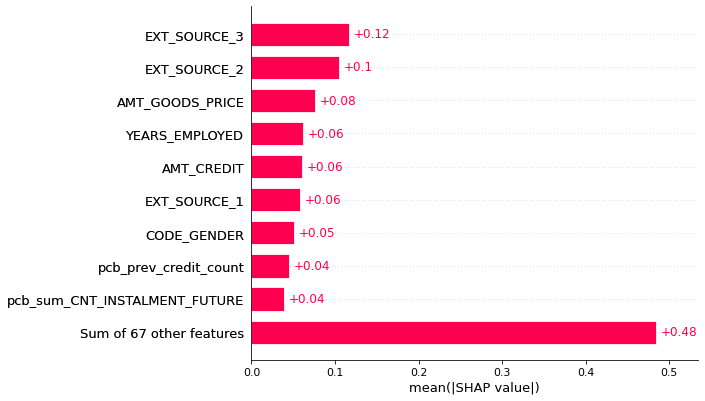

In [123]:
# Global bar plot
shap.plots.bar(shap_values)

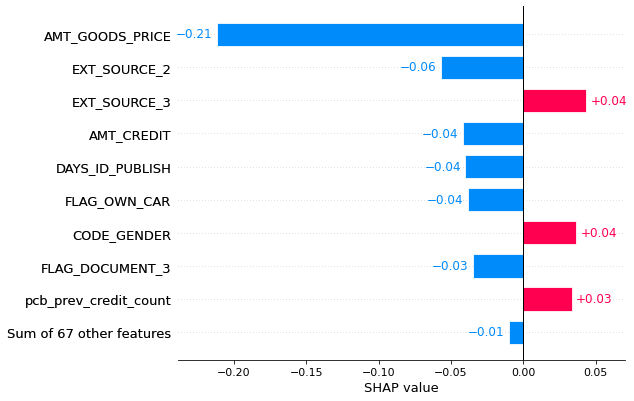

In [144]:
# Local bar plot (TARGET = 1)
shap.plots.bar(shap_values[0])

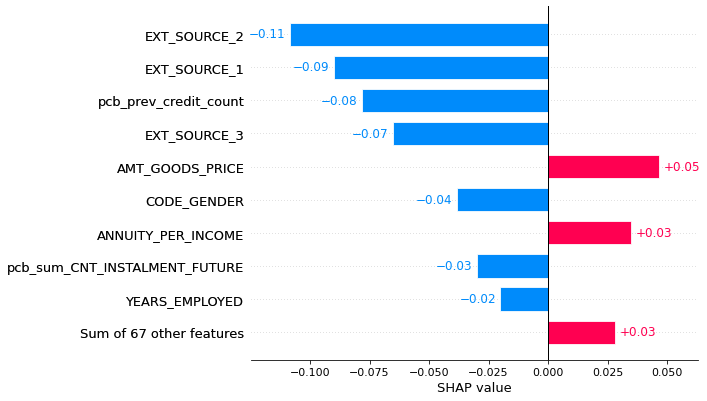

In [145]:
# Local bar plot (TARGET = 0)
shap.plots.bar(shap_values[1])

### Feature Selection

In [72]:
X_train_fs = X_resampled.filter(['EXT_SOURCE_3', 'EXT_SOURCE_2',
                                 'AMT_GOODS_PRICE','YEARS_EMPLOYED',
                                 'AMT_CREDIT', 'EXT_SOURCE_1',
                                 'CODE_GENDER'])

X_val_fs = X_val_e.filter(['EXT_SOURCE_3', 'EXT_SOURCE_2',
                                 'AMT_GOODS_PRICE','YEARS_EMPLOYED',
                                 'AMT_CREDIT', 'EXT_SOURCE_1',
                                 'CODE_GENDER'])

X_train_fs.shape, X_val_fs.shape, y_resampled.shape, y_val.shape

((452296, 7), (61503, 7), (452296,), (61503,))

In [74]:
xgb_fs = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(xgb_fs, X_train_fs, y_resampled, scoring='roc_auc', cv=cv)
scores.mean()

[19:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.7976439665037124

[19:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


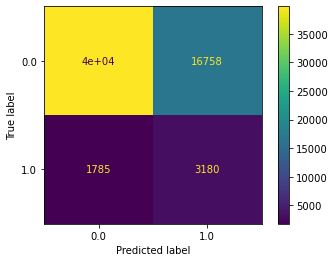

In [75]:
xgb_fs.fit(X_train_fs, y_resampled)
y_pred_fs = xgb_fs.predict(X_val_fs)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_fs)

In [138]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_fs.score(X_train_fs, y_resampled)))
print('Accuracy of XGB classifier on validation set: {:.2f}'
       .format(xgb_fs.score(X_val_fs, y_val)))
print(classification_report(y_val, y_pred_fs))

Accuracy of XGB classifier on training set: 0.73
Accuracy of XGB classifier on validation set: 0.70
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     56538
         1.0       0.16      0.64      0.26      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.70      0.77     61503



In [143]:
xgb_fs.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [129]:
y_pred_proba_fs = xgb_fs.predict_proba(X_val_fs)
y_pred_proba_fs = y_pred_proba_fs[:][:,1]

y_val_fs_temp = y_val.copy()
y_val_fs_temp.reset_index(drop=True, inplace=True)
y_pred_proba_fs = pd.concat([y_val_fs_temp, pd.DataFrame(y_pred_proba_fs)], axis=1)

y_pred_proba_fs.columns = ['y_val_actual', 'y_pred_proba']
y_pred_proba_fs.index = X_val_fs.index

Text(0, 0.5, 'True Positive Rate')

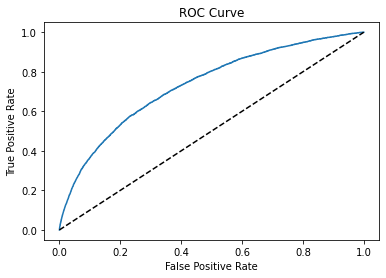

In [130]:
fpr, tpr, thresholds = roc_curve(y_pred_proba_fs['y_val_actual'], y_pred_proba_fs['y_pred_proba'])
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle='--', color='k')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

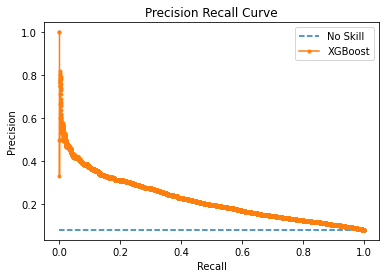

In [142]:
no_skill = len(y_val[y_val == 1]) / len(y_val)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')

precision, recall, thresholds = precision_recall_curve(y_pred_proba_fs['y_val_actual'], y_pred_proba_fs['y_pred_proba'])
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

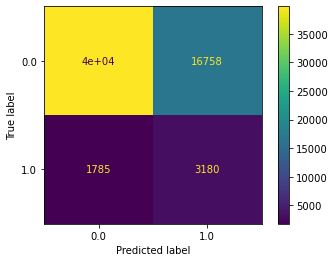

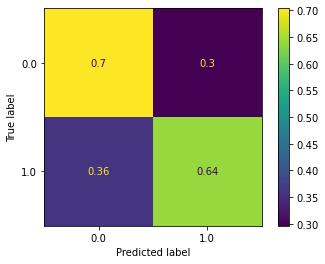

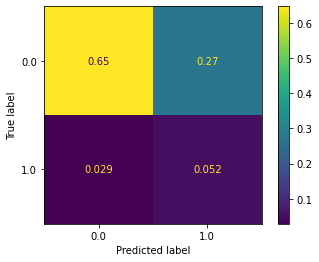

In [136]:
t = 0.5
y_pred_proba_fs['y_val_pred'] = np.where(y_pred_proba_fs['y_pred_proba'] > t, 1, 0)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_proba_fs['y_val_pred'])
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_proba_fs['y_val_pred'], normalize='true')
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_proba_fs['y_val_pred'], normalize='all')

### Prediction

In [151]:
predictions = xgb_fs.predict_proba(X_val_fs)
predictions

array([[0.5648382 , 0.4351618 ],
       [0.79873747, 0.20126253],
       [0.17900968, 0.8209903 ],
       ...,
       [0.52912045, 0.47087955],
       [0.46713394, 0.53286606],
       [0.31764507, 0.6823549 ]], dtype=float32)

In [164]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(xgb_fs.predict(X_val_fs), columns = ['predicted_TARGET'])
df_val_dataset = y_val.to_frame().reset_index(drop=True)

dfx=pd.concat([df_val_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.head()

,TARGET,prob_0,prob_1,predicted_TARGET
0,0.0,0.564838,0.435162,0.0
1,0.0,0.798737,0.201263,0.0
2,0.0,0.179010,0.820990,1.0
3,0.0,0.536987,0.463013,0.0
4,0.0,0.456898,0.543102,1.0


In [166]:
dfx.to_csv("Model_Prediction.xlsx", sep=',', encoding='UTF-8')

In [168]:
joblib.dump(xgb_fs, 'XGB_fs_Classifier_CreditScoring')

['XGB_fs_Classifier_CreditScoring']